# Loading Standard Libraries

In [67]:
# standard library load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve

# Loading and Checking the Data

In [2]:
# loading the data
raw_data = pd.read_csv("loan_data_set.csv")
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y


In [4]:
# Drop irrelevant columns (e.g., Loan_ID)
raw_data.drop('Loan_ID', axis=1, inplace=True)

# Checking and Fixing Missing Values

In [4]:
# checking the columns with missing values
missing_values_count = raw_data.isnull().sum()
print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
LoanIncomeRatio      27
dtype: int64


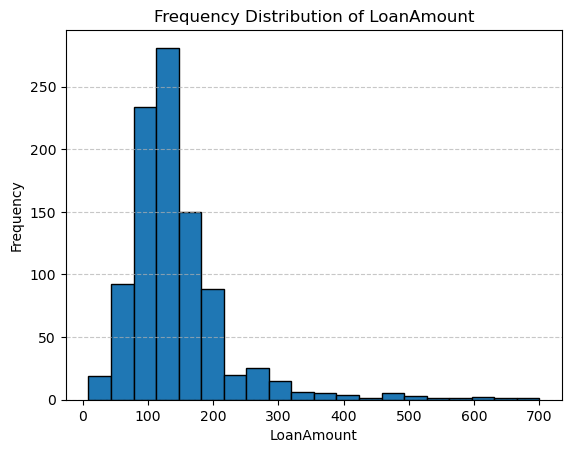

In [6]:
# As loan amount has 27 missing values plotting the frequency distribution of Loan Amount
plt.hist(raw_data['LoanAmount'], bins=20, edgecolor='k')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of LoanAmount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
#since loan Amount is almost normally distributed, we can fill in the missing values with the Average
imputer_num = SimpleImputer(strategy='mean')

# reshaping 1D array into a 2D array
loan_amount_2d = raw_data['LoanAmount'].values.reshape(-1, 1)

# Apply imputation to fill blanks with mean
raw_data['LoanAmount'] = imputer_num.fit_transform(loan_amount_2d)

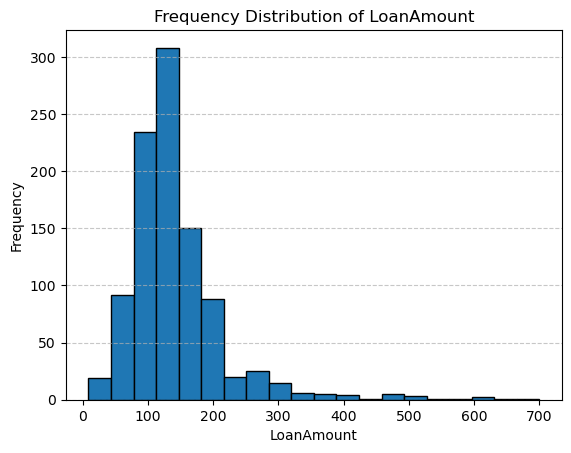

In [12]:
# Plot the frequency distribution of Loan Amount after filling in missing values
plt.hist(raw_data['LoanAmount'], bins=20, edgecolor='k')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of LoanAmount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Features Study : Checking the Loan Disburshment Across Features

In [18]:
# Chanfing Loan_Status Y & N to 1 & 0 
raw_data['Loan_Status'] = raw_data['Loan_Status'].replace({'Y': 1, 'N': 0})

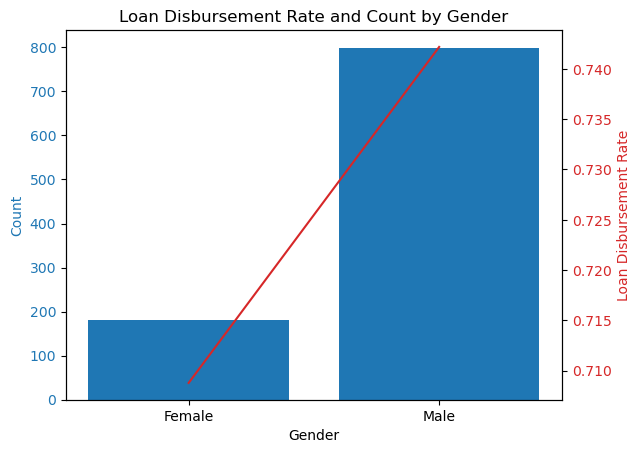

In [19]:
# checking average loan disburshment across different variables
result_gen = raw_data.groupby('Gender').agg({'Loan_Status': ['count', 'sum']}).reset_index()

result_gen.columns = ['Gender', 'Count', 'Sum']
result_gen["Loan_Disburshment_Rate"] = result_gen["Sum"]/result_gen["Count"]


# Plotting
fig, ax1 = plt.subplots()

# Bar plot for count
color = 'tab:blue'
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count', color=color)
ax1.bar(result_gen['Gender'], result_gen['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


# Creating a secondary y-axis for loan disbursement rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loan Disbursement Rate', color=color)
ax2.plot(result_gen['Gender'], result_gen['Loan_Disburshment_Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title('Loan Disbursement Rate and Count by Gender')

# Show plot
plt.show()

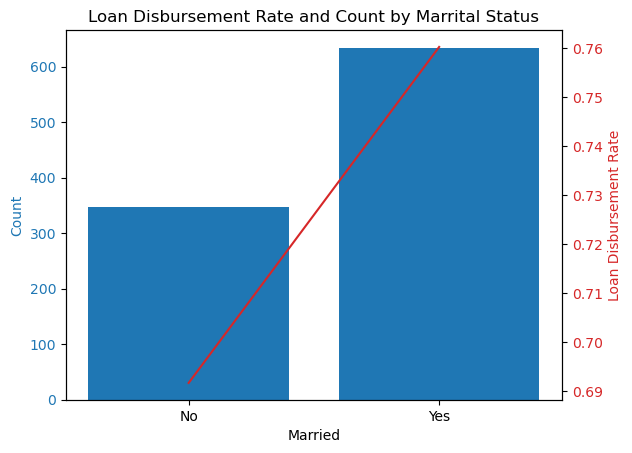

In [22]:
#across marital status
result_ms = raw_data.groupby('Married').agg({'Loan_Status': ['count', 'sum']}).reset_index()

result_ms.columns = ['Married', 'Count', 'Sum']
result_ms["Loan_Disburshment_Rate"] = result_ms["Sum"]/result_ms["Count"]

# Plotting
fig, ax1 = plt.subplots()

# Bar plot for count
color = 'tab:blue'
ax1.set_xlabel('Married')
ax1.set_ylabel('Count', color=color)
ax1.bar(result_ms['Married'], result_ms['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


# Creating a secondary y-axis for loan disbursement rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loan Disbursement Rate', color=color)
ax2.plot(result_ms['Married'], result_ms['Loan_Disburshment_Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title('Loan Disbursement Rate and Count by Marrital Status')

# Show plot
plt.show()

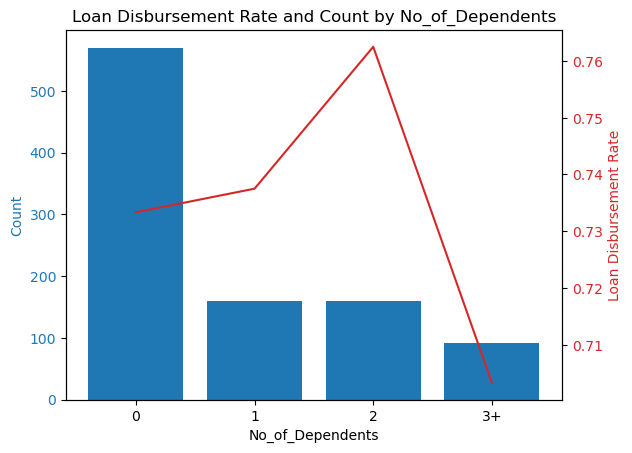

In [24]:
#across dependents
result_dpnd = raw_data.groupby('Dependents').agg({'Loan_Status': ['count', 'sum']}).reset_index()

result_dpnd.columns = ['No_of_Dependents', 'Count', 'Sum']
result_dpnd["Loan_Disburshment_Rate"] = result_dpnd["Sum"]/result_dpnd["Count"]

# Plotting
fig, ax1 = plt.subplots()

# Bar plot for count
color = 'tab:blue'
ax1.set_xlabel('No_of_Dependents')
ax1.set_ylabel('Count', color=color)
ax1.bar(result_dpnd['No_of_Dependents'], result_dpnd['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


# Creating a secondary y-axis for loan disbursement rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loan Disbursement Rate', color=color)
ax2.plot(result_dpnd['No_of_Dependents'], result_dpnd['Loan_Disburshment_Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title('Loan Disbursement Rate and Count by No_of_Dependents')

# Show plot
plt.show()

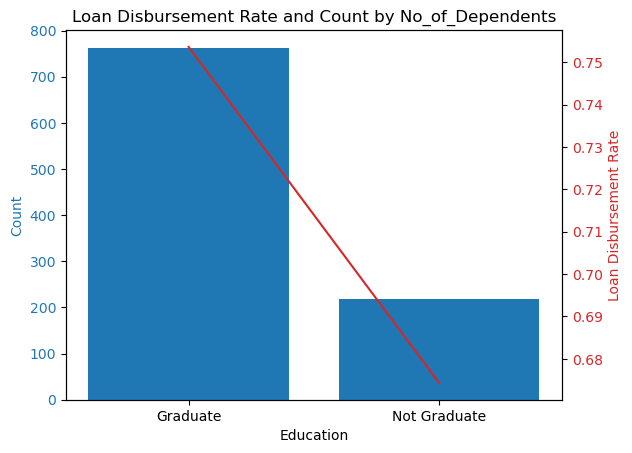

In [26]:
# across education
result_edu = raw_data.groupby('Education').agg({'Loan_Status': ['count', 'sum']}).reset_index()

result_edu.columns = ['Education', 'Count', 'Sum']
result_edu["Loan_Disburshment_Rate"] = result_edu["Sum"]/result_edu["Count"]

# Plotting
fig, ax1 = plt.subplots()

# Bar plot for count
color = 'tab:blue'
ax1.set_xlabel('Education')
ax1.set_ylabel('Count', color=color)
ax1.bar(result_edu['Education'], result_edu['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


# Creating a secondary y-axis for loan disbursement rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loan Disbursement Rate', color=color)
ax2.plot(result_edu['Education'], result_edu['Loan_Disburshment_Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title('Loan Disbursement Rate and Count by No_of_Dependents')

# Show plot
plt.show()

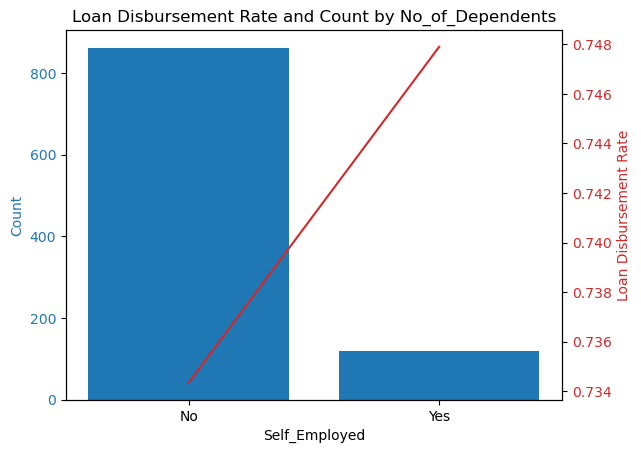

In [27]:
#across self employment
result_emp = raw_data.groupby('Self_Employed').agg({'Loan_Status': ['count', 'sum']}).reset_index()

result_emp.columns = ['Self_Employed', 'Count', 'Sum']
result_emp["Loan_Disburshment_Rate"] = result_emp["Sum"]/result_emp["Count"]

# Plotting
fig, ax1 = plt.subplots()

# Bar plot for count
color = 'tab:blue'
ax1.set_xlabel('Self_Employed')
ax1.set_ylabel('Count', color=color)
ax1.bar(result_emp['Self_Employed'], result_emp['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


# Creating a secondary y-axis for loan disbursement rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loan Disbursement Rate', color=color)
ax2.plot(result_emp['Self_Employed'], result_emp['Loan_Disburshment_Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title('Loan Disbursement Rate and Count by No_of_Dependents')

# Show plot
plt.show()

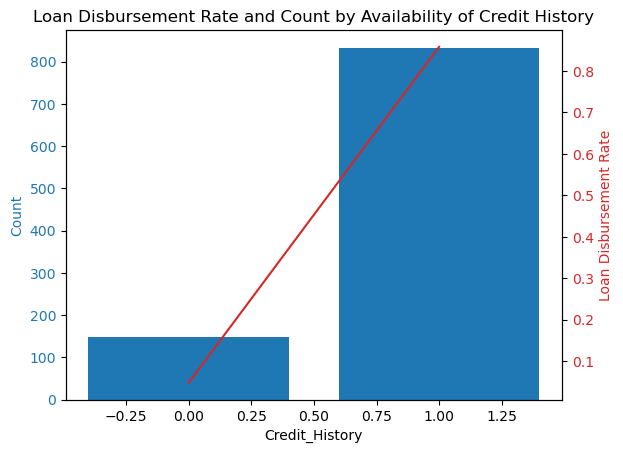

In [36]:
#across self credit History
result_ch = raw_data.groupby('Credit_History').agg({'Loan_Status': ['count', 'sum']}).reset_index()

result_ch.columns = ['Credit_History', 'Count', 'Sum']
result_ch["Loan_Disburshment_Rate"] = result_ch["Sum"]/result_ch["Count"]

# Plotting
fig, ax1 = plt.subplots()

# Bar plot for count
color = 'tab:blue'
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count', color=color)
ax1.bar(result_ch['Credit_History'], result_ch['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


# Creating a secondary y-axis for loan disbursement rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loan Disbursement Rate', color=color)
ax2.plot(result_ch['Credit_History'], result_ch['Loan_Disburshment_Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title('Loan Disbursement Rate and Count by Availability of Credit History')

# Show plot
plt.show()

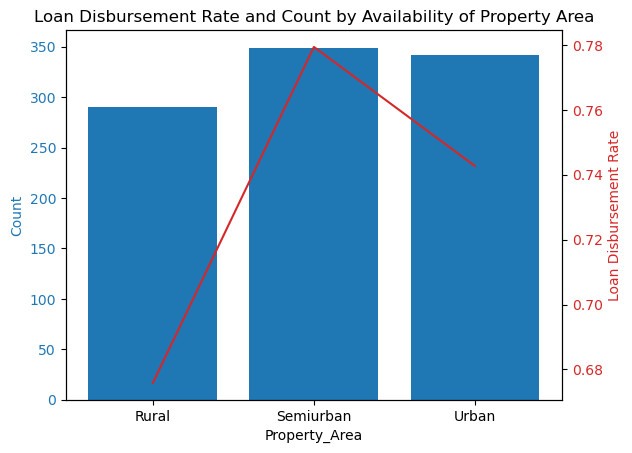

In [38]:
#across Property_Area
result_pa = raw_data.groupby('Property_Area').agg({'Loan_Status': ['count', 'sum']}).reset_index()

result_pa.columns = ['Property_Area', 'Count', 'Sum']
result_pa["Loan_Disburshment_Rate"] = result_pa["Sum"]/result_pa["Count"]

# Plotting
fig, ax1 = plt.subplots()

# Bar plot for count
color = 'tab:blue'
ax1.set_xlabel('Property_Area')
ax1.set_ylabel('Count', color=color)
ax1.bar(result_pa['Property_Area'], result_pa['Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


# Creating a secondary y-axis for loan disbursement rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loan Disbursement Rate', color=color)
ax2.plot(result_pa['Property_Area'], result_pa['Loan_Disburshment_Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title('Loan Disbursement Rate and Count by Availability of Property Area')

# Show plot
plt.show()

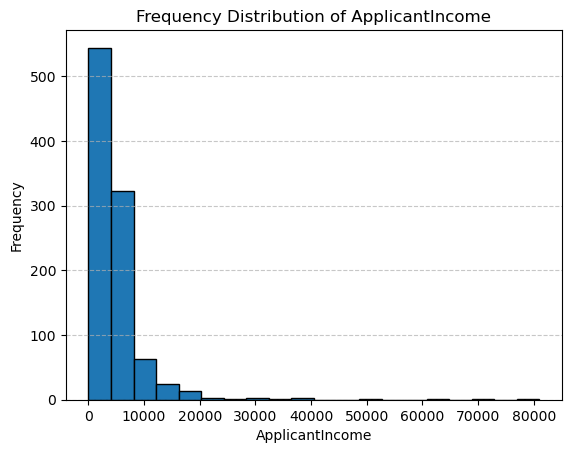

In [28]:
# Plotting the frequency distribution of ApplicantIncome
plt.hist(raw_data['ApplicantIncome'], bins=20, edgecolor='k')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of ApplicantIncome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Applicant Income is skewed. Trying some transformations

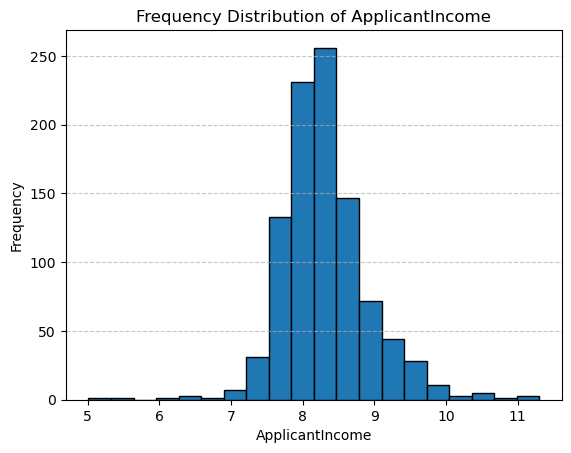

In [29]:
# Doing Log Transformation
# Filter out negative or zero values
valid_income = raw_data['ApplicantIncome'][raw_data['ApplicantIncome'] > 0]

# Taking the log of valid income
log_income = np.log(valid_income)


plt.hist(log_income, bins=20, edgecolor='k')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of ApplicantIncome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

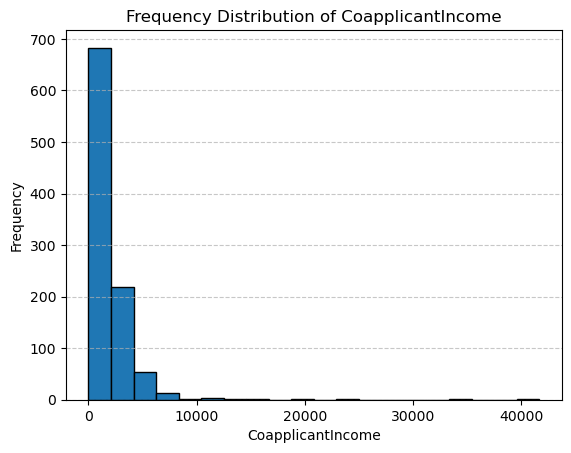

In [32]:
# Plotting the frequency distribution of CoapplicantIncome
plt.hist(raw_data['CoapplicantIncome'], bins=20, edgecolor='k')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of CoapplicantIncome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

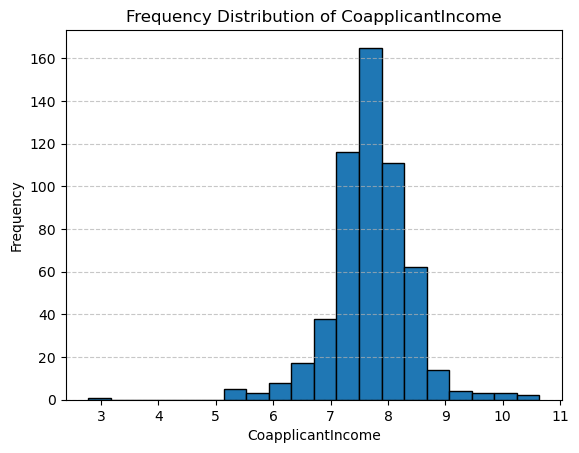

In [33]:
# Filtering out negative or zero values
c_valid_income = raw_data['CoapplicantIncome'][raw_data['CoapplicantIncome'] > 0]

# Taking the log of valid income
c_log_income = np.log(c_valid_income)

plt.hist(c_log_income, bins=20, edgecolor='k')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of CoapplicantIncome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

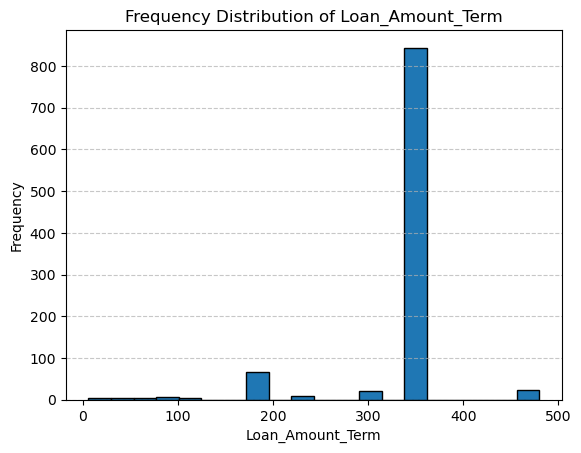

In [34]:
# Plotting the frequency distribution of Loan AMount term
plt.hist(raw_data['Loan_Amount_Term'], bins=20, edgecolor='k')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Loan_Amount_Term')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

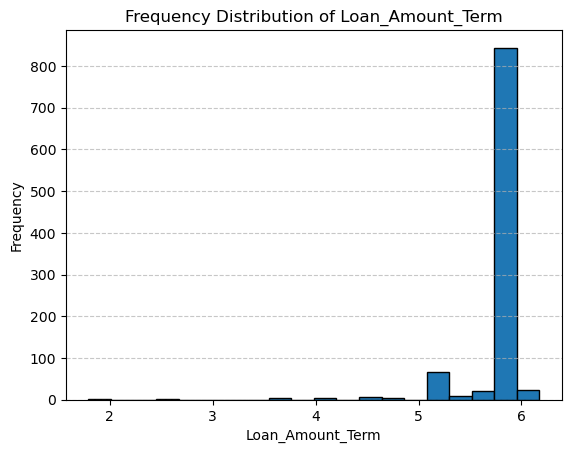

In [35]:
# Plotting the frequency distribution of Loan AMount term
# Filtering out negative or zero values
valid_term = raw_data['Loan_Amount_Term'][raw_data['Loan_Amount_Term'] > 0]

# Taking the log of valid income
log_term = np.log(valid_term)

plt.hist(log_term, bins=20, edgecolor='k')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Loan_Amount_Term')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Log Transformation hasn't changed much for Loan AMount Term. Thus we will not use Log Transformation of this variable in model training.

# Feature engineering : Creating Two new features from available variables

In [39]:
# Feature engineering
# Creating two new features TotalIncome combining ApplicantIncome and CoapplicantIncome and LoanIncomeRatio as LoanAmount / TotalIncome
raw_data['TotalIncome'] = raw_data['ApplicantIncome'] + raw_data['CoapplicantIncome']
raw_data['LoanIncomeRatio'] = raw_data['LoanAmount'] / raw_data['TotalIncome']

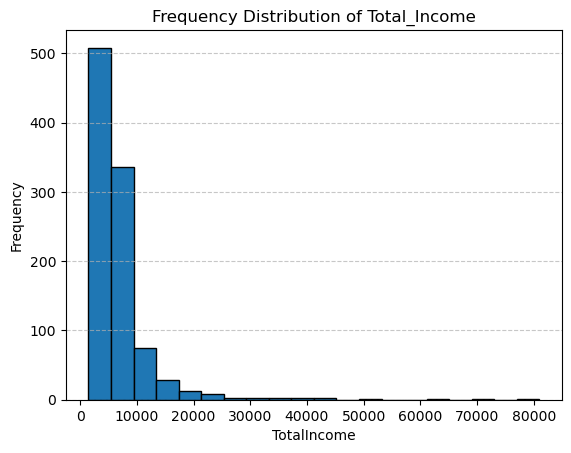

In [40]:
# Ploting the frequency distribution of Total Income
plt.hist(raw_data['TotalIncome'], bins=20, edgecolor='k')
plt.xlabel('TotalIncome')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Total_Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

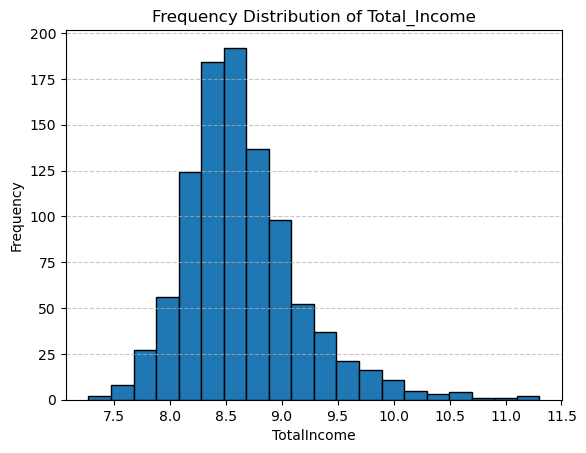

In [41]:
# Checking Log Transformation of Total Income
valid_ti = raw_data['TotalIncome'][raw_data['TotalIncome'] > 0]

# Taking the log of valid income
log_ti = np.log(valid_ti)


plt.hist(log_ti, bins=20, edgecolor='k')
plt.xlabel('TotalIncome')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Total_Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

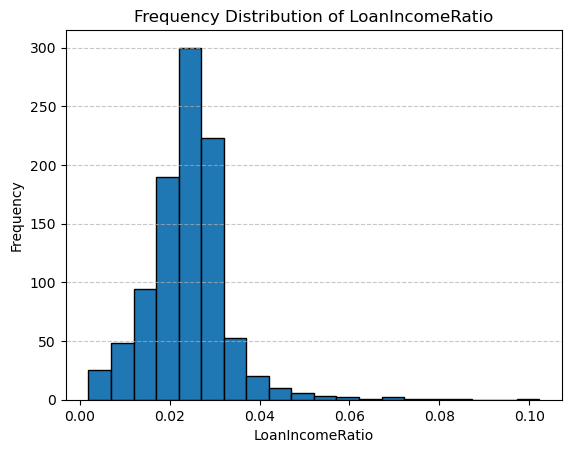

In [42]:
# Ploting the frequency distribution of Loan to Income Ratio
plt.hist(raw_data['LoanIncomeRatio'], bins=20, edgecolor='k')
plt.xlabel('LoanIncomeRatio')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of LoanIncomeRatio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

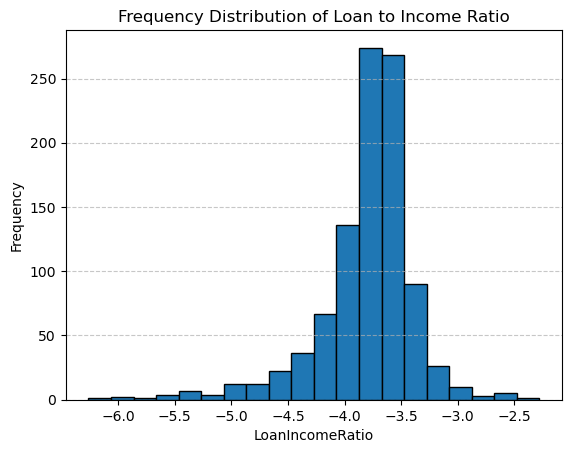

In [43]:
# Checking Log Transformation of Loan to Income Ratio
valid_ti = raw_data['LoanIncomeRatio'][raw_data['LoanIncomeRatio'] > 0]

# Taking the log of valid income
log_ti = np.log(valid_ti)


plt.hist(log_ti, bins=20, edgecolor='k')
plt.xlabel('LoanIncomeRatio')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Loan to Income Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Data Preprocessing

In [46]:
# converting string variables to float
raw_data['Gender'] = raw_data['Gender'].replace({'Male': 1, 'Female': 0})
raw_data['Married'] = raw_data['Married'].replace({'Yes': 1, 'No': 0})
raw_data['Dependents'] = raw_data['Dependents'].replace({'0':0,'1': 1, '2': 2, '3+':3 })
raw_data['Education'] = raw_data['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
raw_data['Self_Employed'] = raw_data['Self_Employed'].replace({'Yes': 1, 'No': 0})
raw_data['Property_Area'] = raw_data['Dependents'].replace({'Rural': 1, 'Urban': 2, 'Semiurban':3 })

In [48]:
# doing log transformation
raw_data['Log_ApplicantIncome'] = np.where(raw_data['ApplicantIncome'] > 0, np.log(raw_data['ApplicantIncome']), np.nan)
raw_data['Log_CoapplicantIncome'] = np.where(raw_data['CoapplicantIncome'] > 0, np.log(raw_data['CoapplicantIncome']), np.nan)
raw_data['Log_TotalIncome'] = np.where(raw_data['TotalIncome'] > 0, np.log(raw_data['TotalIncome']), np.nan)

C:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
#defining X and y for model training
non_log_col = ['ApplicantIncome', 'CoapplicantIncome','TotalIncome','Loan_Status']
log_col = ['Log_ApplicantIncome', 'Log_CoapplicantIncome', 'Log_TotalIncome','Loan_Status']

y = raw_data["Loan_Status"]
X = raw_data.drop("Loan_Status", axis=1)
X_norm = raw_data.drop(columns=log_col, axis=1)
X_log = raw_data.drop(columns=non_log_col, axis=1)

# Training and Testing Random Forest Model

In [63]:
# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a parameter grid for GridSearchCV. I have tweaked the parameter values accodrding to the available data
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 8, 10, 11],
    'min_samples_split': [2, 5,7, 8, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, 
                           param_grid=param_grid, 
                           cv=5)

Doing traning testing split
Fitting the model
Get the best parameters and best estimator
Best Parameters for: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Make predictions on the test set for
Publishing Confusion Matrix


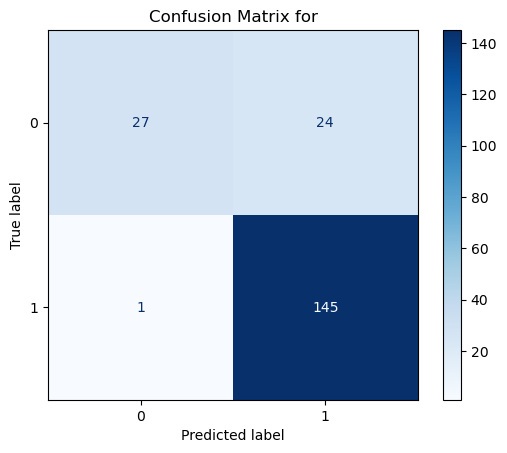

              precision    recall  f1-score   support

           0       0.96      0.53      0.68        51
           1       0.86      0.99      0.92       146

    accuracy                           0.87       197
   macro avg       0.91      0.76      0.80       197
weighted avg       0.89      0.87      0.86       197



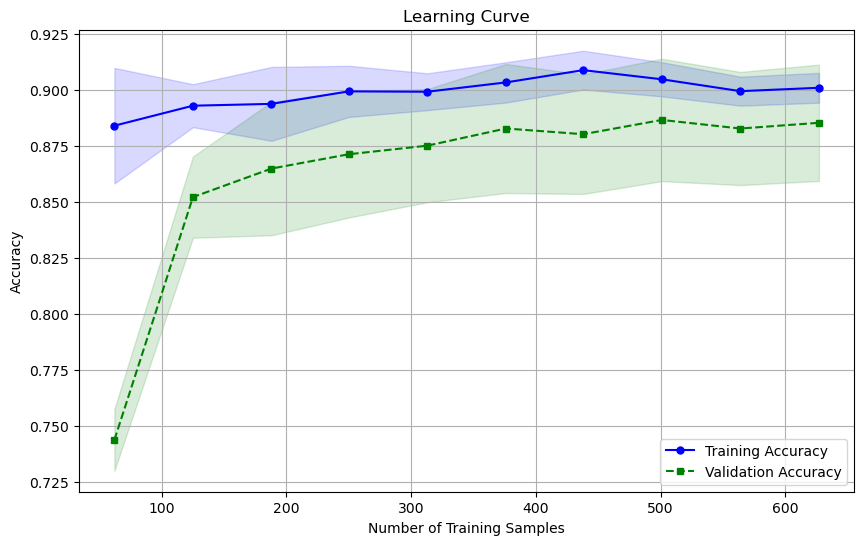

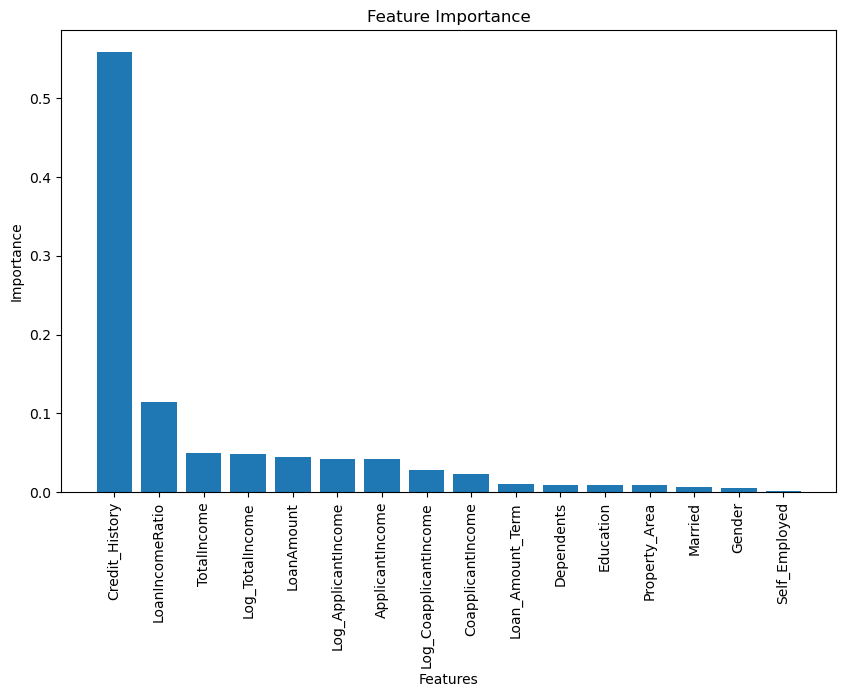

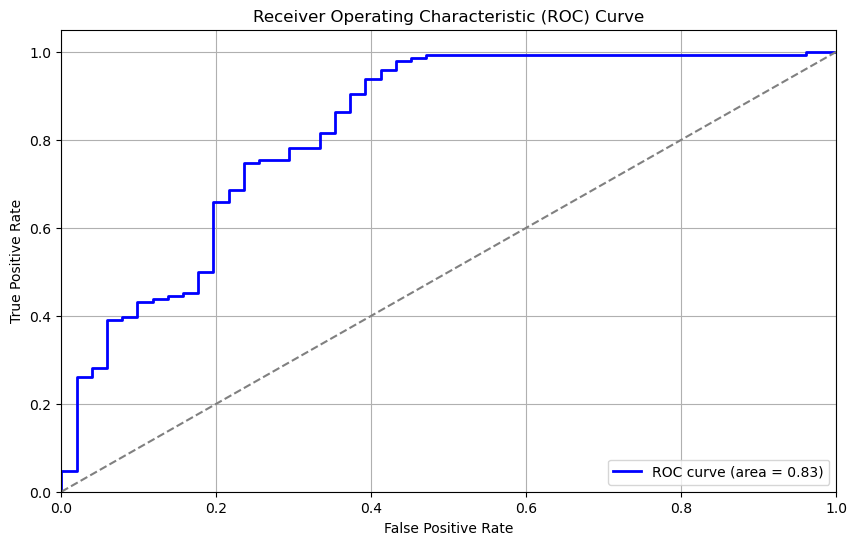

Doing traning testing split
Fitting the model
Get the best parameters and best estimator
Best Parameters for: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Make predictions on the test set for
Publishing Confusion Matrix


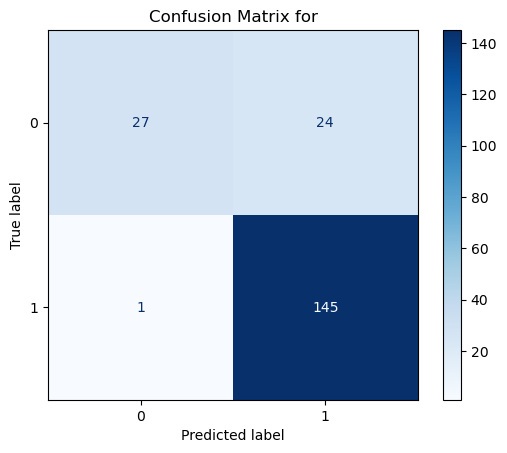

              precision    recall  f1-score   support

           0       0.96      0.53      0.68        51
           1       0.86      0.99      0.92       146

    accuracy                           0.87       197
   macro avg       0.91      0.76      0.80       197
weighted avg       0.89      0.87      0.86       197



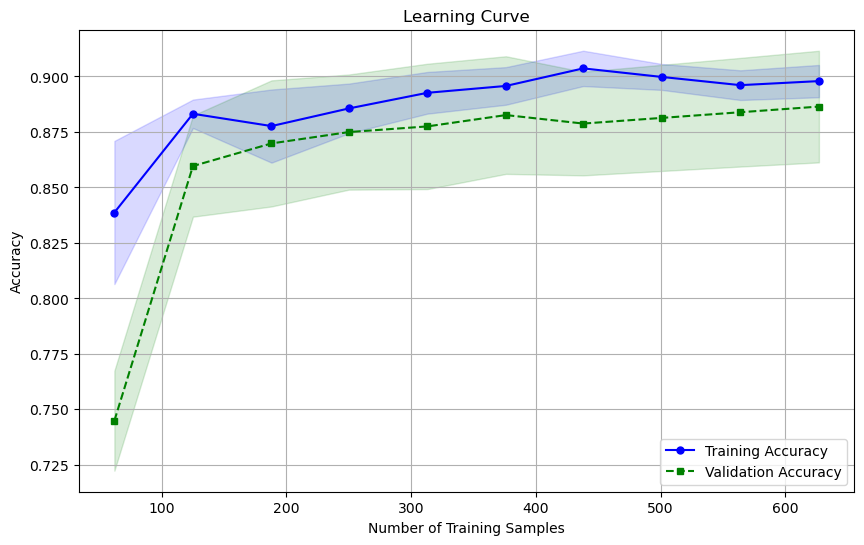

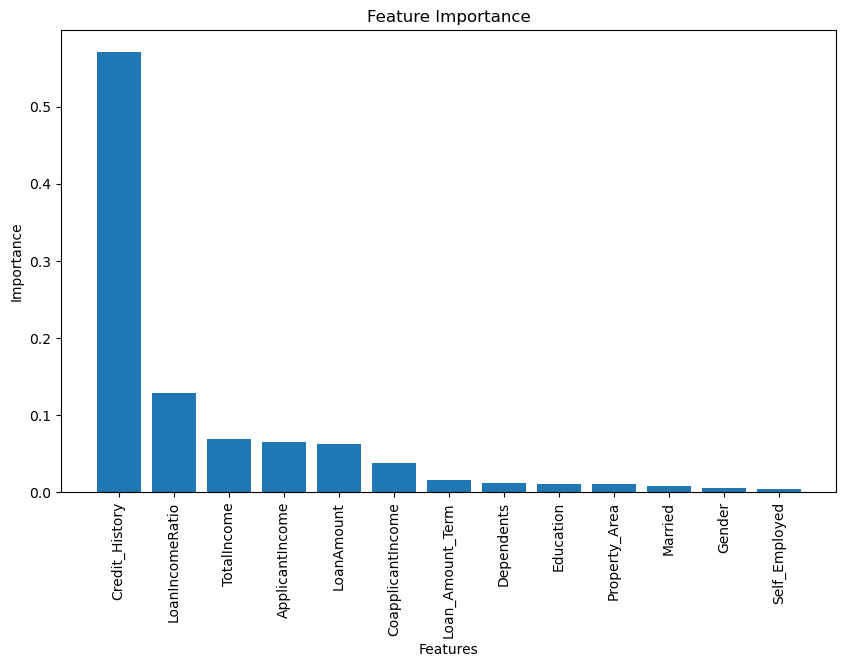

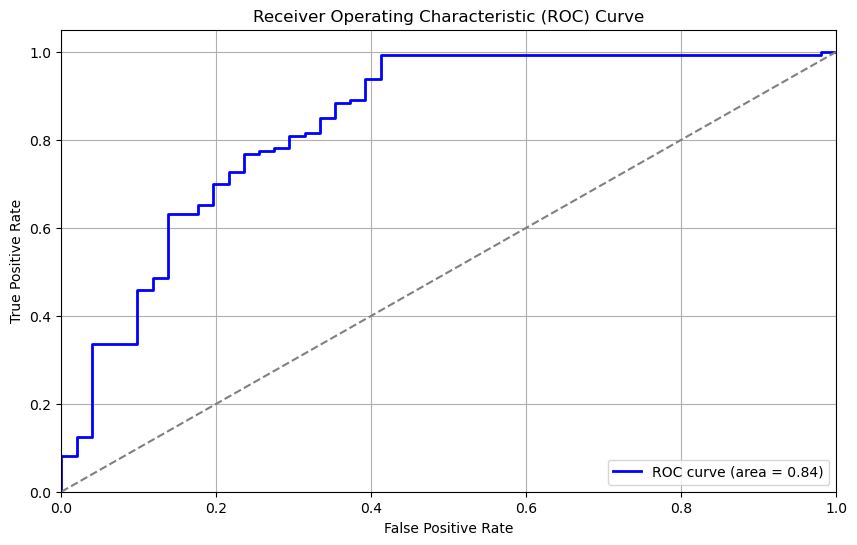

Doing traning testing split
Fitting the model
Get the best parameters and best estimator
Best Parameters for: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Make predictions on the test set for
Publishing Confusion Matrix


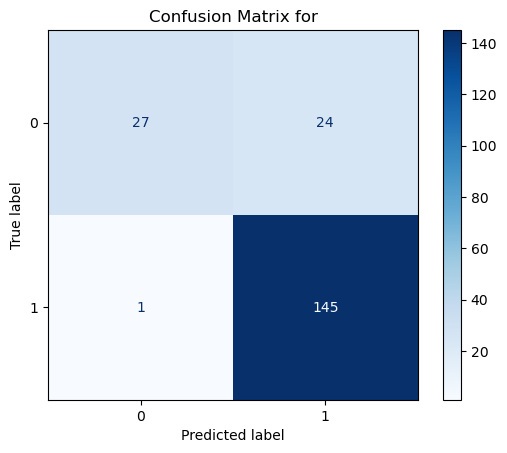

              precision    recall  f1-score   support

           0       0.96      0.53      0.68        51
           1       0.86      0.99      0.92       146

    accuracy                           0.87       197
   macro avg       0.91      0.76      0.80       197
weighted avg       0.89      0.87      0.86       197



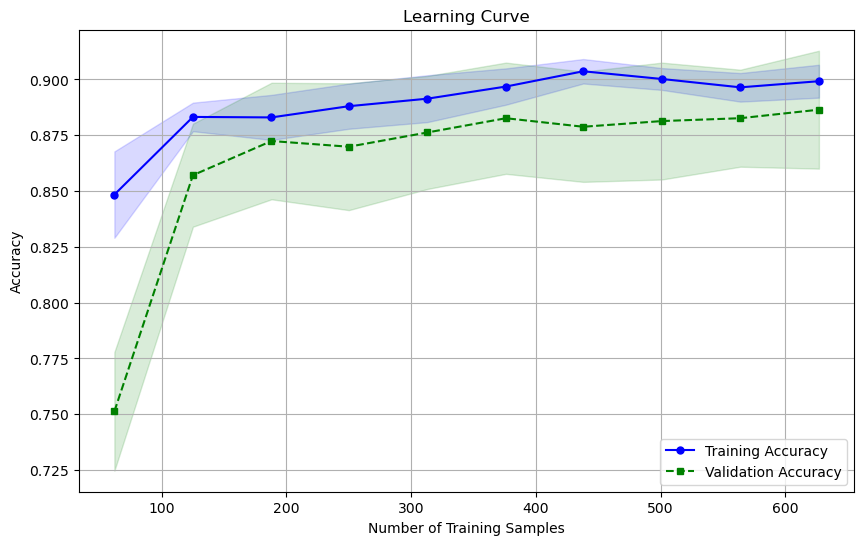

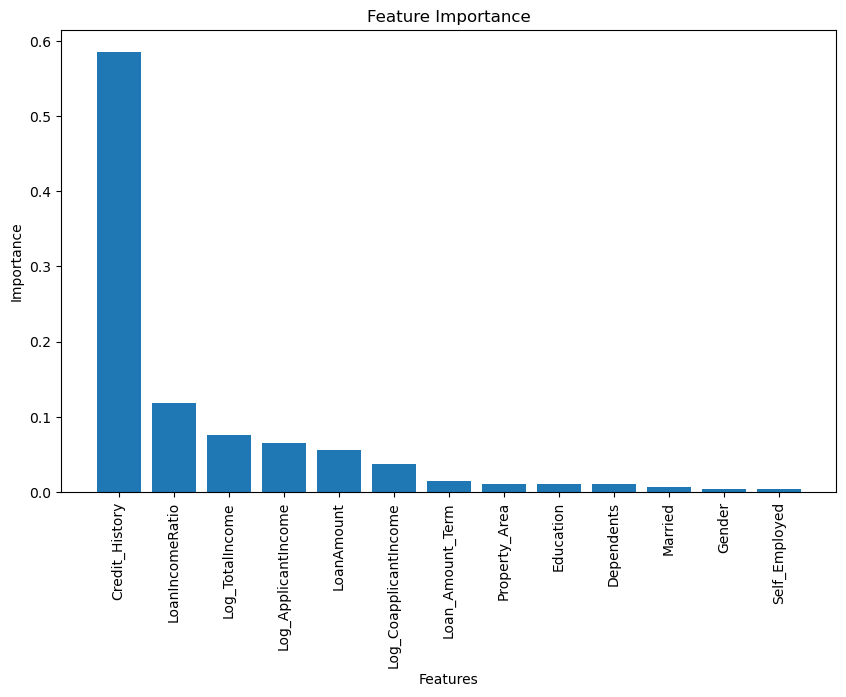

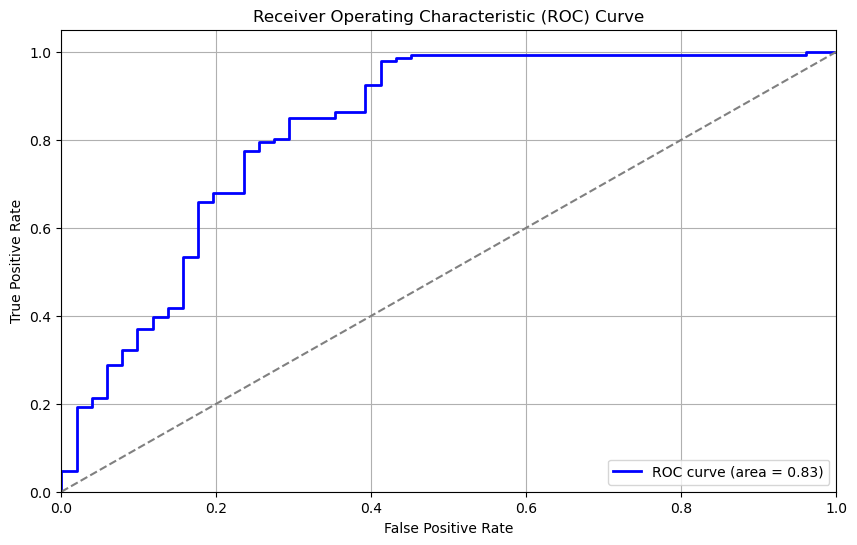

In [68]:
#creating loop to train random forest classifier on all three data sets: Combined Variables (Normal + Log Transformed), 
# Normal valriables, Lof transformed Variables. Also plotting Confusion Matrix, Learning Curve and Roc Curve for model Evaluation.

training_data = [X,X_norm,X_log]

for data in training_data:
    print ("Doing traning testing split")
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
    
    print ("Fitting the model")
    grid_search.fit(X_train, y_train)
    
    print ("Get the best parameters and best estimator")
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Print the best parameters
    print("Best Parameters for:", best_params)
    
    print ("Make predictions on the test set for")
    y_pred = best_estimator.predict(X_test)

    # Calculate the probabilities for class 1 (positive class)
    y_prob = best_estimator.predict_proba(X_test)[:, 1]
    
    print ("Publishing Confusion Matrix")
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Confusion Matrix for')
    plt.show()
    
    print(classification_report(y_test, y_pred))
    
    
    # Bias-Variance Tradeoff: Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(estimator=grid_search.best_estimator_, 
                                                            X=X_train, 
                                                            y=y_train, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10), 
                                                            cv=5, 
                                                            scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    # Feature Importance
    feature_importance = grid_search.best_estimator_.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx], rotation=90)
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()
    
    # Plot ROC Curve
    y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Final Selected Random Forest Classifier Model

Doing traning testing split
Fitting the model
Get the best parameters and best estimator
Best Parameters for: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Make predictions on the test set for
Publishing Confusion Matrix


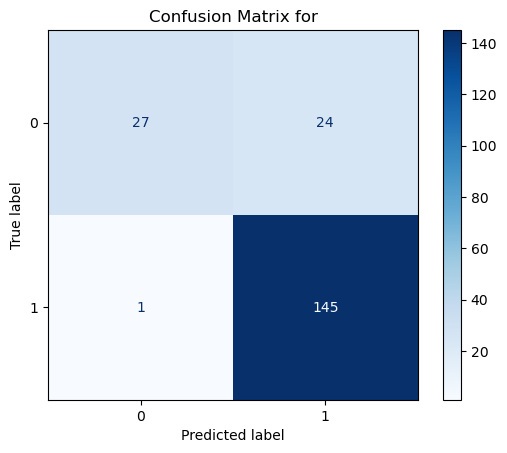

              precision    recall  f1-score   support

           0       0.96      0.53      0.68        51
           1       0.86      0.99      0.92       146

    accuracy                           0.87       197
   macro avg       0.91      0.76      0.80       197
weighted avg       0.89      0.87      0.86       197



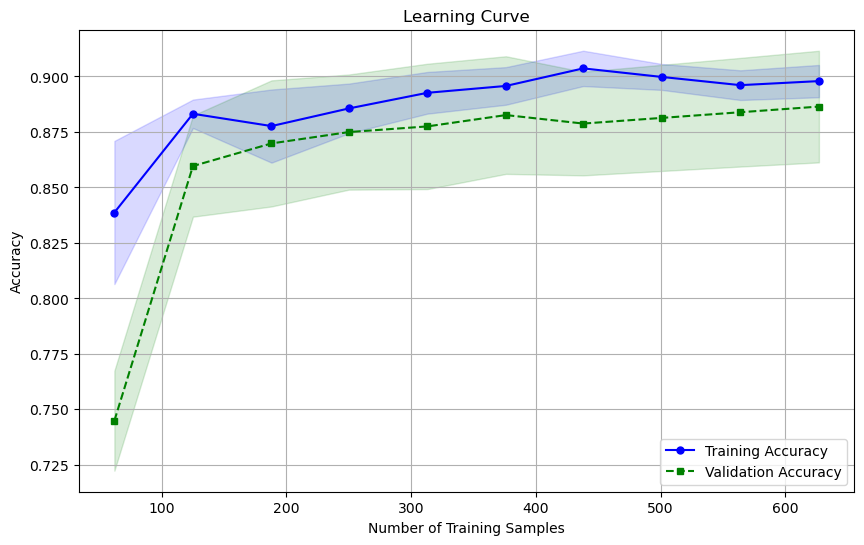

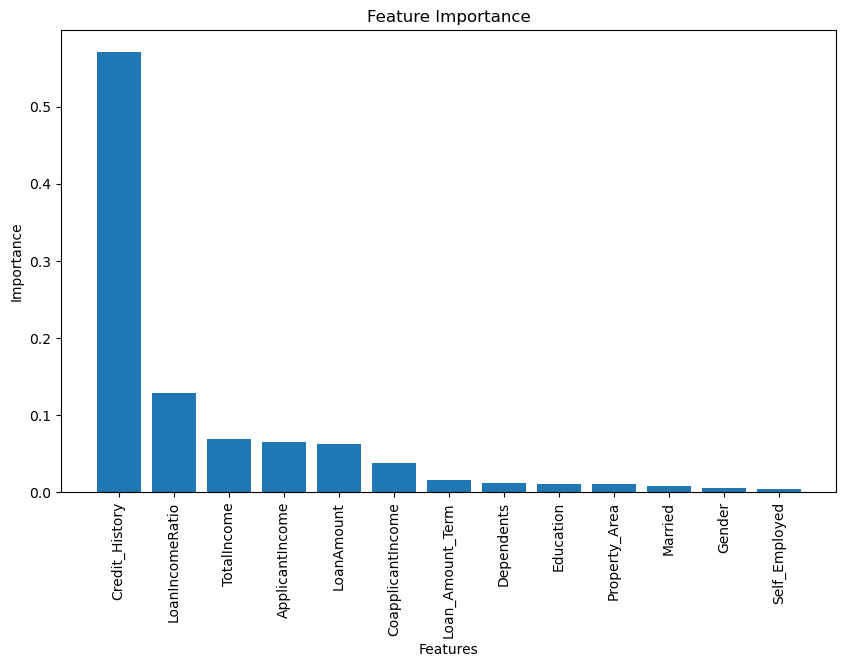

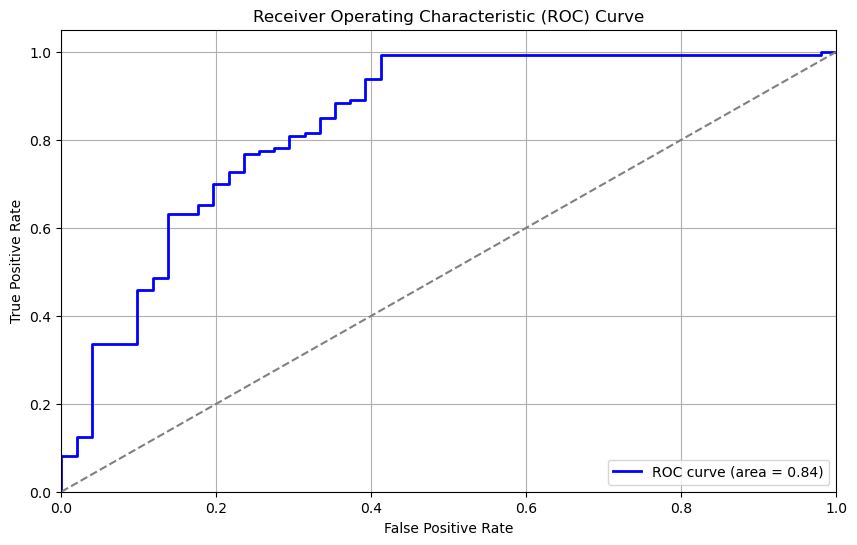

In [73]:
training_data = [X_norm]

for data in training_data:
    print ("Doing traning testing split")
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
    
    print ("Fitting the model")
    grid_search.fit(X_train, y_train)
    
    print ("Get the best parameters and best estimator")
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Print the best parameters
    print("Best Parameters for:", best_params)
    
    print ("Make predictions on the test set for")
    y_pred = best_estimator.predict(X_test)

    # Calculate the probabilities for class 1 (positive class)
    y_prob = best_estimator.predict_proba(X_test)[:, 1]
    
    print ("Publishing Confusion Matrix")
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Confusion Matrix for')
    plt.show()
    
    print(classification_report(y_test, y_pred))
    
    
    # Bias-Variance Tradeoff: Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(estimator=grid_search.best_estimator_, 
                                                            X=X_train, 
                                                            y=y_train, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10), 
                                                            cv=5, 
                                                            scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    # Feature Importance
    feature_importance = grid_search.best_estimator_.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx], rotation=90)
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()
    
    # Plot ROC Curve
    y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Appendix : Trying Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression()

Doing traning testing split
Fitting the model
Get the best parameters and best estimator
Best Parameters for: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Make predictions on the test set for
Publishing Confusion Matrix


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


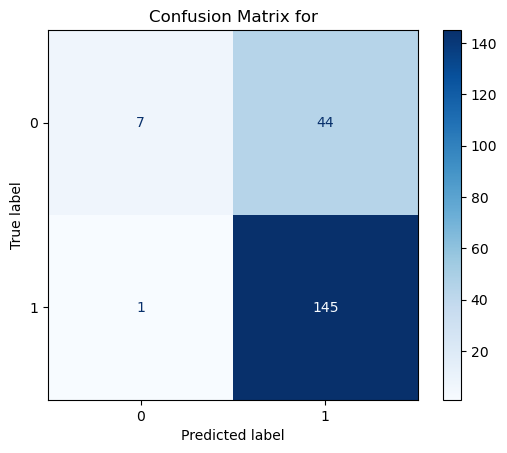

              precision    recall  f1-score   support

           0       0.88      0.14      0.24        51
           1       0.77      0.99      0.87       146

    accuracy                           0.77       197
   macro avg       0.82      0.57      0.55       197
weighted avg       0.80      0.77      0.70       197



C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

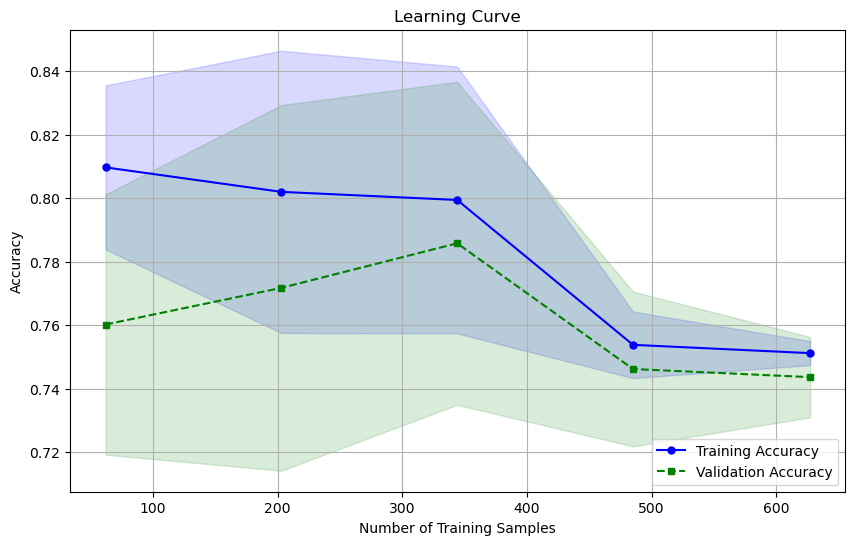

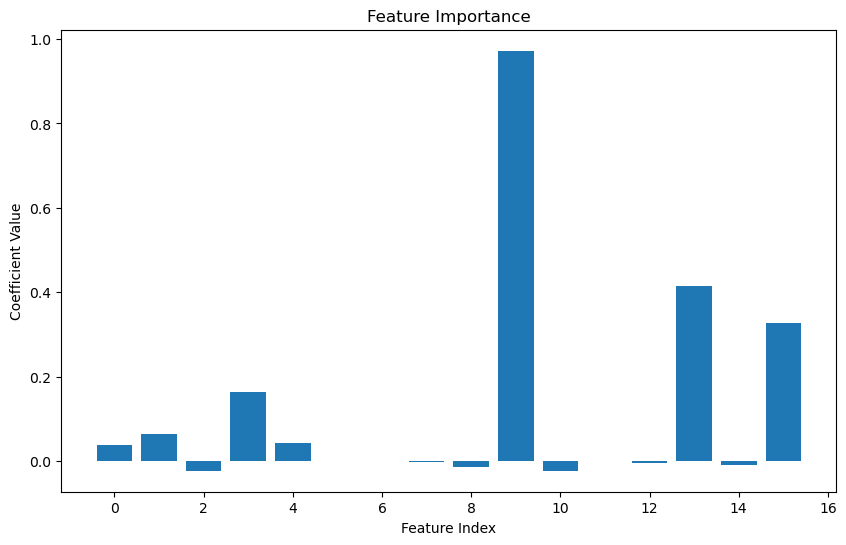

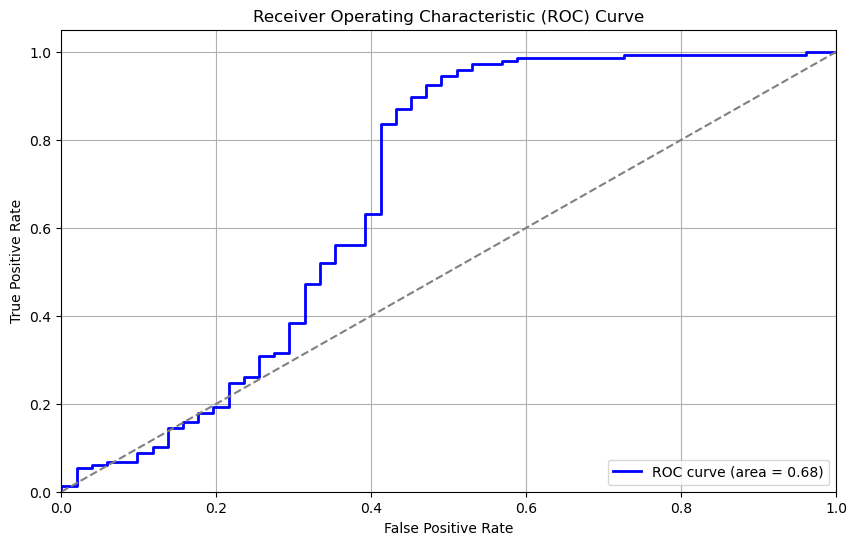

Doing traning testing split
Fitting the model
Get the best parameters and best estimator
Best Parameters for: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Make predictions on the test set for
Publishing Confusion Matrix


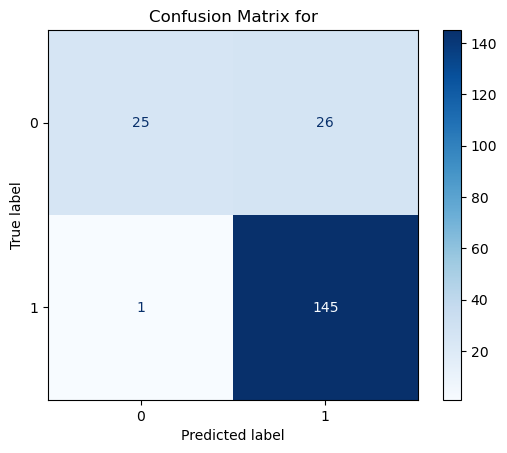

              precision    recall  f1-score   support

           0       0.96      0.49      0.65        51
           1       0.85      0.99      0.91       146

    accuracy                           0.86       197
   macro avg       0.90      0.74      0.78       197
weighted avg       0.88      0.86      0.85       197



C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

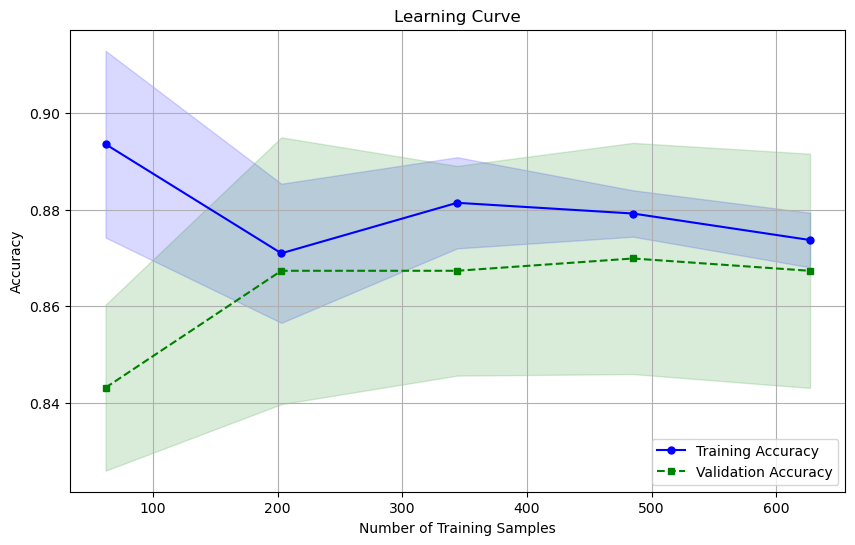

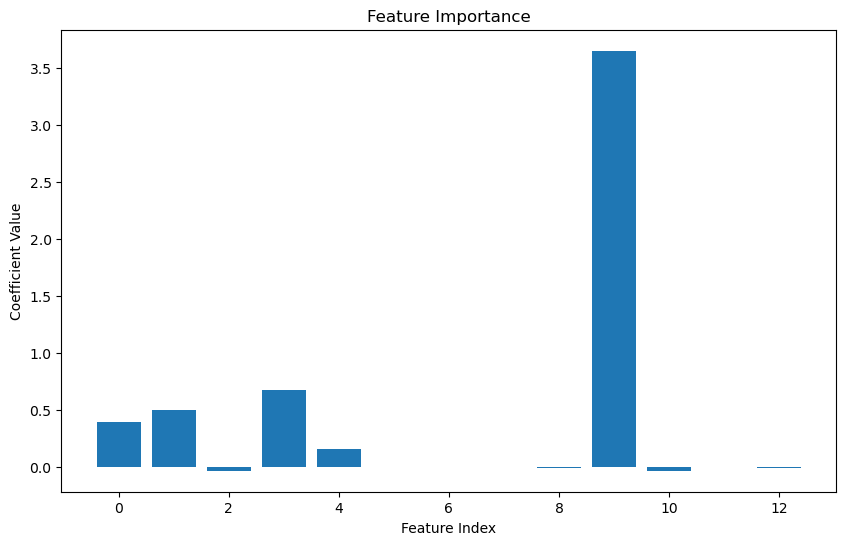

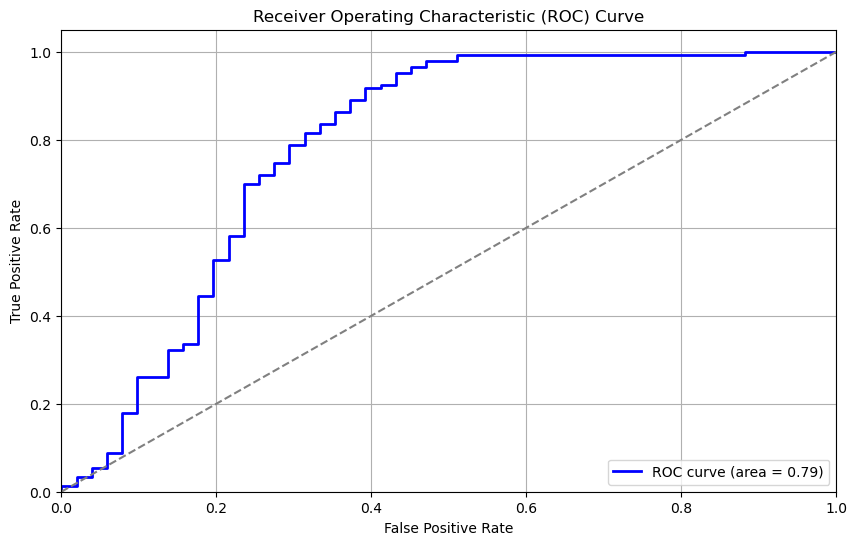

Doing traning testing split
Fitting the model
Get the best parameters and best estimator
Best Parameters for: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Make predictions on the test set for
Publishing Confusion Matrix


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


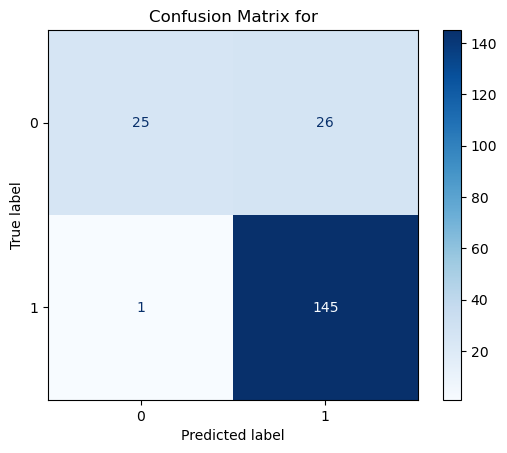

              precision    recall  f1-score   support

           0       0.96      0.49      0.65        51
           1       0.85      0.99      0.91       146

    accuracy                           0.86       197
   macro avg       0.90      0.74      0.78       197
weighted avg       0.88      0.86      0.85       197



C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

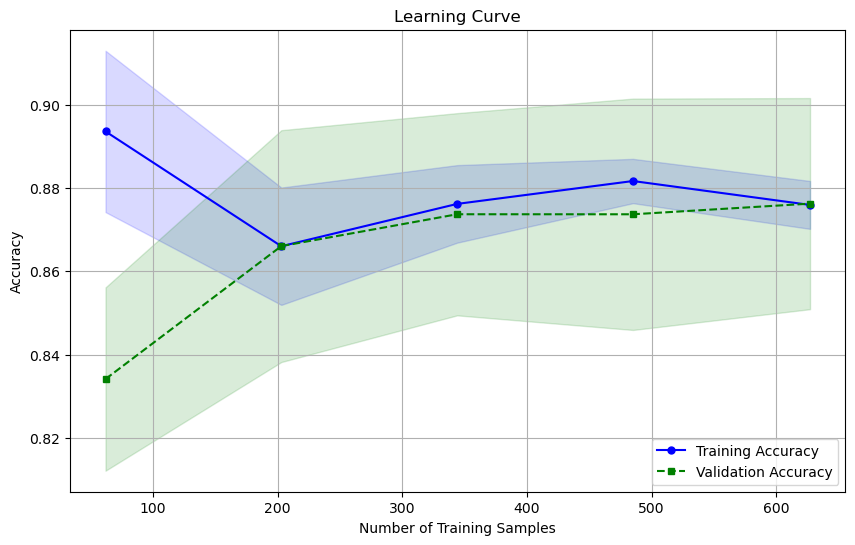

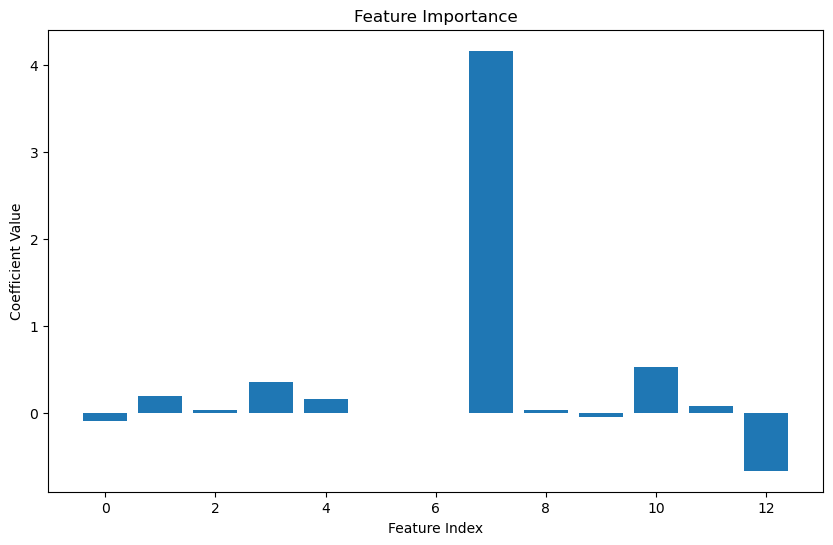

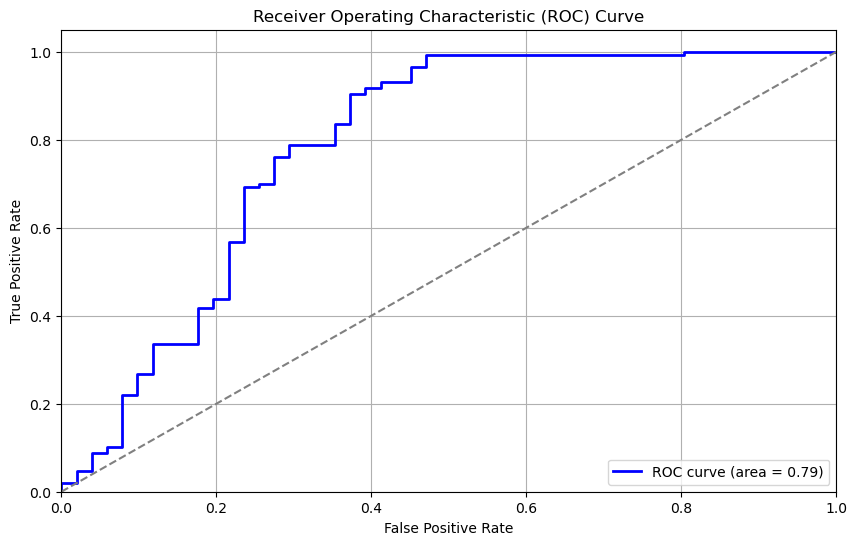

In [72]:
training_data = [X,X_norm,X_log]

for data in training_data:
    print ("Doing traning testing split")
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
    
    print ("Fitting the model")
    model.fit(X_train, y_train)
    
    print ("Get the best parameters and best estimator")
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Print the best parameters
    print("Best Parameters for:", best_params)
    
    print ("Make predictions on the test set for")
    y_pred = model.predict(X_test)

    # Calculate the probabilities for class 1 (positive class)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print ("Publishing Confusion Matrix")
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Confusion Matrix for')
    plt.show()
    
    print(classification_report(y_test, y_pred))
    
    
    # Bias-Variance Tradeoff: Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, cv=5)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    # Feature Importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(model.coef_[0])), model.coef_[0])
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title('Feature Importance')
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()